In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
data = pd.read_csv("income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


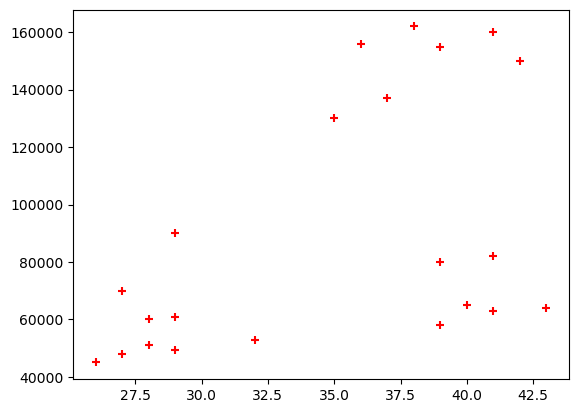

In [3]:
plt.scatter(data['Age'],data['Income($)'],marker='+',color='red')

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
data['cluster'] = y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


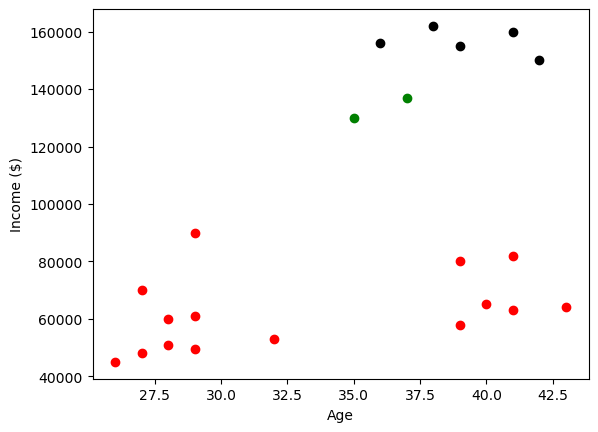

In [7]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'], color='green')
plt.scatter(df2['Age'],df2['Income($)'], color='red')
plt.scatter(df3['Age'],df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['Income($)']])
data[['Income($)']] = scaler.transform(data[['Income($)']])

In [9]:
scaler.fit(data[['Age']])
data[['Age']] = scaler.transform(data[['Age']])
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,0


In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income($)']])
y_predicted

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [11]:
data['cluster'] = y_predicted
data

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [12]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

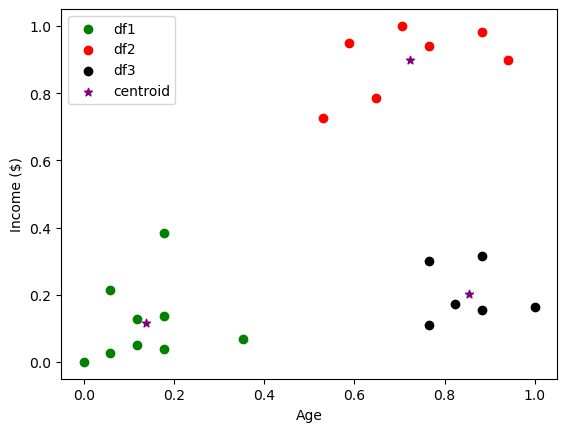

In [13]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'], color='green',label = 'df1')
plt.scatter(df2['Age'],df2['Income($)'], color='red',label = 'df2')
plt.scatter(df3['Age'],df3['Income($)'], color='black',label = 'df3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

In [14]:
k_range = range(1,10)
sum_of_square_error = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sum_of_square_error.append(km.inertia_)

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

In [15]:
sum_of_square_error

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2798062931046179,
 0.2824643690681409,
 0.18957351152808527,
 0.14257076249690037,
 0.12104007625145945]

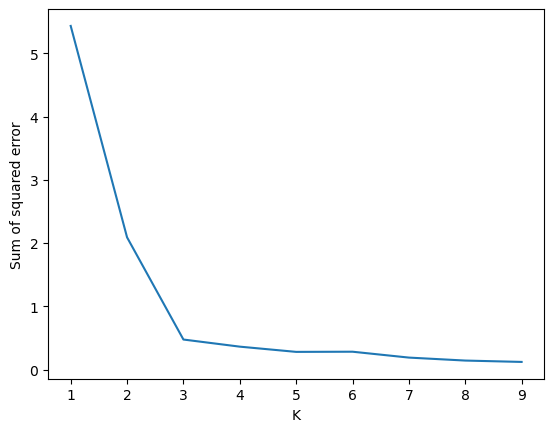

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sum_of_square_error)

In [17]:
from sklearn.datasets import load_iris
load_iris = load_iris()

In [19]:
dir(load_iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
load_iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
load_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [23]:
iris_data = pd.DataFrame(load_iris.data[:,2:],columns=load_iris.feature_names[2:])
iris_data

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


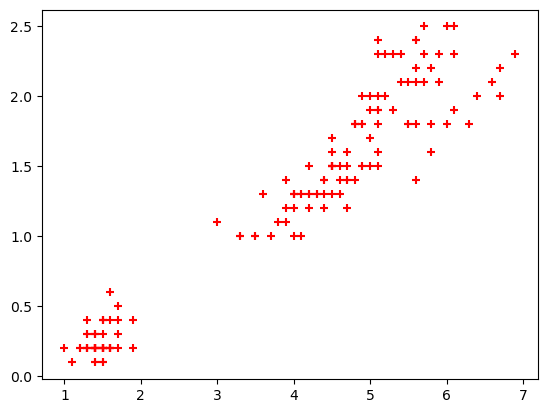

In [24]:
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'],marker = '+',color='red')

In [26]:
from sklearn.cluster import KMeans
km = KMeans()
pred = km.fit_predict(iris_data[['petal length (cm)','petal width (cm)']])

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 6, 3, 3, 3, 0, 3, 6, 0, 6, 6, 3, 0, 3,
       3, 6, 3, 6, 4, 6, 3, 3, 6, 3, 3, 4, 3, 0, 6, 0, 6, 4, 3, 3, 3, 3,
       6, 6, 3, 3, 6, 0, 6, 6, 6, 6, 0, 6, 2, 4, 2, 7, 2, 5, 3, 5, 7, 2,
       4, 4, 2, 4, 4, 4, 7, 5, 5, 3, 2, 4, 5, 4, 2, 7, 4, 4, 2, 7, 7, 5,
       2, 4, 7, 2, 2, 7, 4, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4])

In [27]:
iris_data['cluster'] = pred
iris_data

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,4
146,5.0,1.9,4
147,5.2,2.0,4
148,5.4,2.3,2


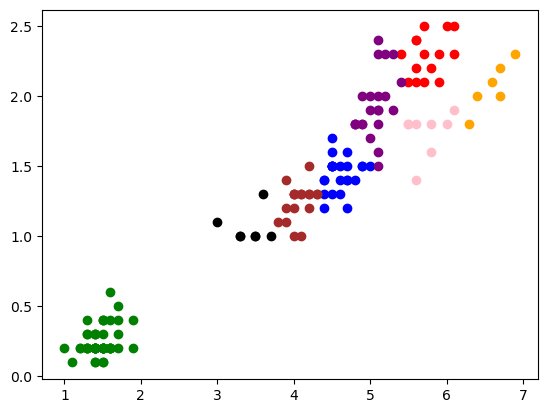

In [ ]:
df0 = iris_data[iris_data['cluster']==0]
df1 = iris_data[iris_data['cluster']==1]
df2 = iris_data[iris_data['cluster']==2]
df3 = iris_data[iris_data['cluster']==3]
df4 = iris_data[iris_data['cluster']==4]
df5 = iris_data[iris_data['cluster']==5]
df6 = iris_data[iris_data['cluster']==6]
df7 = iris_data[iris_data['cluster']==7]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='black',label=df0)
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green',label=df1)
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red',label=df2)
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='blue',label=df3)
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'], color='purple',label=df4)
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'], color='orange',label=df5)
plt.scatter(df6['petal length (cm)'],df6['petal width (cm)'], color='brown',label=df6)
plt.scatter(df7['petal length (cm)'],df7['petal width (cm)'], color='pink',label=df7)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(iris_data[['petal length (cm)']])
iris_data['petal length (cm)'] = scale.transform(iris_data[['petal length (cm)']])
iris_data

,petal length (cm),petal width (cm),cluster
0,0.067797,0.2,1
1,0.067797,0.2,1
2,0.050847,0.2,1
3,0.084746,0.2,1
4,0.067797,0.2,1
...,...,...,...
145,0.711864,2.3,4
146,0.677966,1.9,4
147,0.711864,2.0,4
148,0.745763,2.3,2


In [35]:
scale.fit(iris_data[['petal width (cm)']])
iris_data['petal width (cm)'] = scale.transform(iris_data[['petal width (cm)']])
iris_data

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,4
146,0.677966,0.750000,4
147,0.711864,0.791667,4
148,0.745763,0.916667,2


In [37]:
from sklearn.cluster import KMeans
km = KMeans()
pred = km.fit_predict(iris_data[['petal length (cm)','petal width (cm)']])

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
iris_data = iris_data.drop('cluster',axis=1)
iris_data

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [39]:
iris_data['cluster'] = pred
iris_data

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,2
1,0.067797,0.041667,2
2,0.050847,0.041667,2
3,0.084746,0.041667,2
4,0.067797,0.041667,2
...,...,...,...
145,0.711864,0.916667,7
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,7


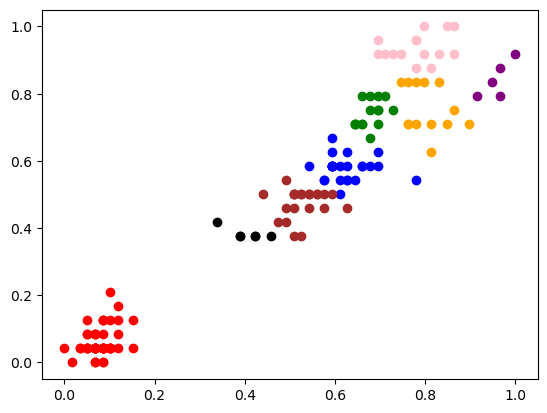

In [40]:
df0 = iris_data[iris_data['cluster']==0]
df1 = iris_data[iris_data['cluster']==1]
df2 = iris_data[iris_data['cluster']==2]
df3 = iris_data[iris_data['cluster']==3]
df4 = iris_data[iris_data['cluster']==4]
df5 = iris_data[iris_data['cluster']==5]
df6 = iris_data[iris_data['cluster']==6]
df7 = iris_data[iris_data['cluster']==7]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='black',label=df0)
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green',label=df1)
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red',label=df2)
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='blue',label=df3)
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'], color='purple',label=df4)
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'], color='orange',label=df5)
plt.scatter(df6['petal length (cm)'],df6['petal width (cm)'], color='brown',label=df6)
plt.scatter(df7['petal length (cm)'],df7['petal width (cm)'], color='pink',label=df7)

In [41]:
km.cluster_centers_

array([[0.4039548 , 0.38194444],
       [0.6779661 , 0.73888889],
       [0.07830508, 0.06083333],
       [0.625     , 0.57638889],
       [0.95932203, 0.84166667],
       [0.80443286, 0.75320513],
       [0.52850539, 0.47348485],
       [0.7819209 , 0.93611111]])

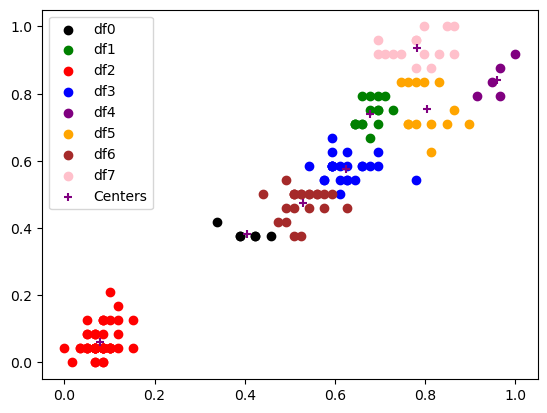

In [44]:
df0 = iris_data[iris_data['cluster']==0]
df1 = iris_data[iris_data['cluster']==1]
df2 = iris_data[iris_data['cluster']==2]
df3 = iris_data[iris_data['cluster']==3]
df4 = iris_data[iris_data['cluster']==4]
df5 = iris_data[iris_data['cluster']==5]
df6 = iris_data[iris_data['cluster']==6]
df7 = iris_data[iris_data['cluster']==7]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='black',label='df0')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green',label='df1')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='red',label='df2')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'], color='blue',label='df3')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'], color='purple',label='df4')
plt.scatter(df5['petal length (cm)'],df5['petal width (cm)'], color='orange',label='df5')
plt.scatter(df6['petal length (cm)'],df6['petal width (cm)'], color='brown',label='df6')
plt.scatter(df7['petal length (cm)'],df7['petal width (cm)'], color='pink',label='df7')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='Centers')
plt.legend()
plt.show()

In [50]:
sum_of_sq_err = []
k_range1 = range(1,16)
for k in k_range1:
    km = KMeans(n_clusters=k)
    km.fit(iris_data[['petal length (cm)','petal width (cm)']])
    err = km.inertia_
    sum_of_sq_err.append(err)
sum_of_sq_err

c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\avika\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1826653136050636,
 0.8538617353912239,
 0.9031914290212159,
 0.6462545216663406,
 0.5491610991902984,
 0.41602409225888737,
 0.389213552198896,
 0.354550606798337,
 0.3567790586182443,
 0.30340753461612685,
 0.2707634525743097,
 0.27246138413875437]

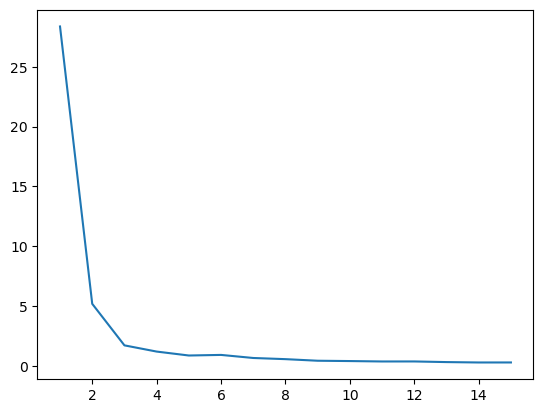

In [51]:
plt.plot(k_range1,sum_of_sq_err)